In [53]:
# Exporto las librerias q voy a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

# Matplotlib: para q pueda mostrar los graficos en el output
%matplotlib inline

# Directorio q voy a trabajar
os.chdir("D:/Teclab/datos/api3/ARCHIVOS/")


In [54]:
# Variables a trabjar
df_edv= pd.read_csv("esperanza_de_vida.csv", encoding="latin-1", sep=",", parse_dates=["anio"])
df_edv


,provincia,anio,mujeres,varones
0,Buenos Aires,2015-01-01,80.22,73.54
1,Buenos Aires,2020-01-01,81.34,74.74
2,Buenos Aires,2025-01-01,82.32,75.80
3,Buenos Aires,2030-01-01,83.20,76.76
4,Buenos Aires,2035-01-01,83.98,77.60
...,...,...,...,...
139,Tucumán,2020-01-01,81.05,75.11
140,Tucumán,2025-01-01,82.11,76.15
141,Tucumán,2030-01-01,83.03,77.07
142,Tucumán,2035-01-01,83.84,77.88


In [74]:
df_poblacion = pd.read_csv("poblacion.csv", encoding="latin-1", sep=",")
df_poblacion = df_poblacion.drop(columns=["poblacion_varones","poblacion_mujeres"])
df_poblacion

,provincia,anio,poblacion_total
0,Total País,2010,40788453
1,Total País,2011,41261490
2,Total País,2012,41733271
3,Total País,2013,42202935
4,Total País,2014,42669500
...,...,...,...
770,Tierra del Fuego,2036,241593
771,Tierra del Fuego,2037,245734
772,Tierra del Fuego,2038,249853
773,Tierra del Fuego,2039,253948


In [76]:
df_hvs = pd.read_csv("hogares_viviendas_superficie.csv", encoding="latin-1", sep=",", index_col=0)
df_hvs = df_hvs.drop(columns=["hogares","viviendas_particulares","viviendas_particulares_habitadas"])
df_hvs_k2 = df_hvs
df_hvs_k2

,provincia,superficie_km2
provincia_id,,
2,Capital Federal,200
6,Buenos Aires,307571
10,Catamarca,102602
14,Córdoba,165321
18,Corrientes,88199
22,Chaco,99633
26,Chubut,224686
30,Entre Ríos,78781
34,Formosa,72066


In [78]:
df_densidad = df_poblacion.merge(df_hvs_k2, how="left", on="provincia")
df_densidad

,provincia,anio,poblacion_total,superficie_km2
0,Total País,2010,40788453,NaN
1,Total País,2011,41261490,NaN
2,Total País,2012,41733271,NaN
3,Total País,2013,42202935,NaN
4,Total País,2014,42669500,NaN
...,...,...,...,...
770,Tierra del Fuego,2036,241593,1002445.0
771,Tierra del Fuego,2037,245734,1002445.0
772,Tierra del Fuego,2038,249853,1002445.0
773,Tierra del Fuego,2039,253948,1002445.0


<Axes: ylabel='provincia'>

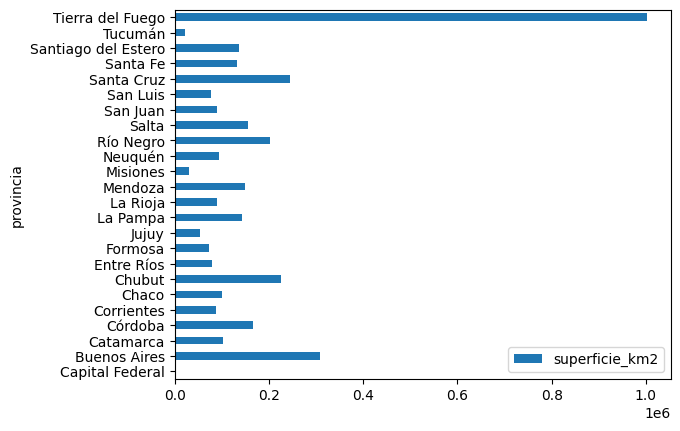

In [103]:
# Grafico de barra q muestra la densidad poblacional x km2
df_hvs_k2.plot(x="provincia", y="superficie_km2", kind="barh")

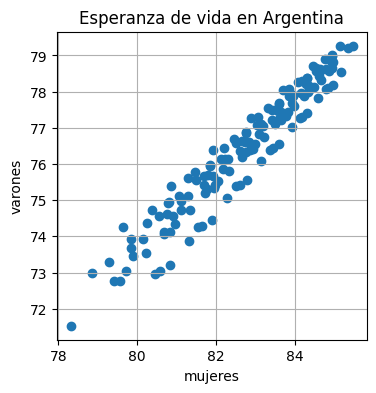

In [ ]:
# Esperanza de vida tanto en Argentina
plt.figure(figsize=(4, 4))
plt.scatter(df_edv['mujeres'], df_edv['varones'])
plt.xlabel('mujeres'); plt.ylabel('varones')
plt.title('Esperanza de vida en Argentina')
plt.grid()

Text(0.5, 1.0, 'Esperanza de vida de Varones en Arg')

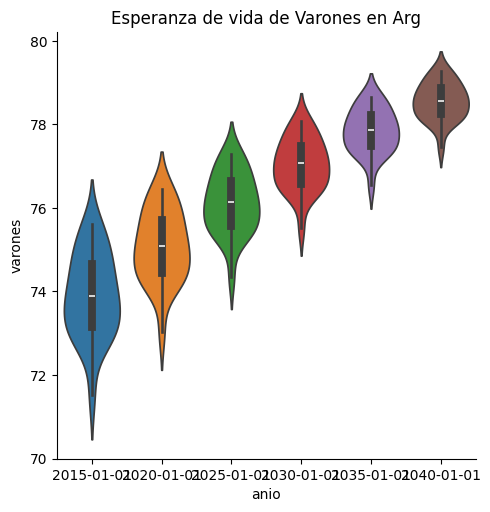

In [ ]:
sns.catplot(data=df_edv, x="anio", y="varones", kind="violin", hue="anio", legend=False)
plt.title("Esperanza de vida de Varones en Arg")

Text(0.5, 1.0, 'Esperanza de vida de Mujeres en Arg')

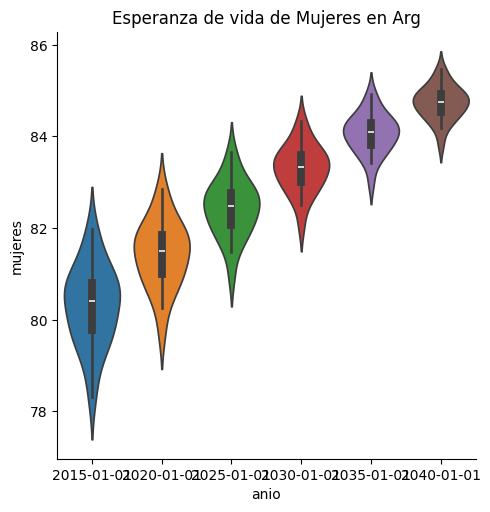

In [ ]:
sns.catplot(data=df_edv, x="anio", y="mujeres", kind="violin",hue="anio", legend=False)
plt.title("Esperanza de vida de Mujeres en Arg")